# Setup
Clone GitHub [repository](https://github.com/ultralytics/ultralytics), install ultralytics and imoprt YOLO.

In [1]:
!git clone https://github.com/ultralytics/ultralytics  # clone
%cd ultralytics
%pip install -e ultralytics
!pip install opencv-python-headless
!pip install py-cpuinfo

fatal: destination path 'ultralytics' already exists and is not an empty directory.
/opt/app-root/src/pokedex-demo/Notebooks/ultralytics
Obtaining file:///opt/app-root/src/pokedex-demo/Notebooks/ultralytics/ultralytics
ERROR: file:///opt/app-root/src/pokedex-demo/Notebooks/ultralytics/ultralytics does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.

[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 231.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from ultralytics import YOLO
from PIL import Image

# Data preparation
Data preparation is usually a big task. You might have to clean, label and format data into training and test data sets. 

We combined a [pre-labeled dataset](https://universe.roboflow.com/other-pokemon-datasets/pokemon-pictures/) from RoboFlow and manually labeled data to create our training and testing data sets. Lucky for you, you just need to Unzip the images and annotations.

**Unzip the images and annotations:**

In [3]:
!ls -l /opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/*

-rw-r--r--. 1 1000770000 1000770000 1843 Nov 30 14:43 /opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/data.yaml
-rw-r--r--. 1 1000770000 1000770000  138 Nov 30 14:43 /opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/README.dataset.txt
-rw-r--r--. 1 1000770000 1000770000  424 Nov 30 14:43 /opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/README.roboflow.txt

/opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/test:
total 32
drwxr-sr-x. 2 1000770000 1000770000 16384 Nov 30 14:43 images
drwxr-sr-x. 2 1000770000 1000770000 16384 Nov 30 14:43 labels

/opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/train:
total 380
drwxr-sr-x. 2 1000770000 1000770000  81920 Nov 30 14:43 images
drwxr-sr-x. 2 1000770000 1000770000  86016 Nov 30 14:43 labels
-rw-r--r--. 1 1000770000 1000770000 218144 Nov 30 17:39 labels.cache

/opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/valid:
total 116
drwxr-sr-x. 2 1000770000 1000770000 28672 Nov 30 14:43 images
drwxr-sr-x. 2 1000770000 1000770

# Start model training
Train a YOLOv8m model on the metal-nut data by specifying dataset, batch-size, image size and pretrained --weights yolov8m.pt. Pretrained weights are auto-downloaded from the latest [YOLOv8 release](https://github.com/ultralytics/ultralytics). Some of the output was removed so you don't have to doom scroll through epochs.

In [7]:
# Load a model
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)
model.train(data='/opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/data.yaml', epochs=600, imgsz=640, batch=16)

Ultralytics YOLOv8.0.221 🚀 Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/data.yaml, epochs=600, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=Fal

train: Scanning /opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/train/labels.cache... 662 images, 2 backgrounds, 0 corrupt: 100%|██████████| 662/662 [00:00<?, ?it/s]
val: Scanning /opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/valid/labels.cache... 188 images, 3 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=6.5e-05, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 600 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/599      7.31G     0.9392      5.369      1.562         20        640: 100%|██████████| 42/42 [00:20<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all        188        199     0.0049      0.353     0.0224     0.0176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/599      7.43G      0.677       4.55      1.373         18        640: 100%|██████████| 42/42 [00:20<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all        188        199       0.59      0.073     0.0751     0.0607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/599      7.43G     0.6645      4.149      1.348         14        640: 100%|██████████| 42/42 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all        188        199      0.686      0.098     0.0935     0.0753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/599      7.43G     0.6818      3.741      1.329         19        640: 100%|██████████| 42/42 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all        188        199      0.724       0.11      0.161      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/599      7.43G     0.6837      3.473      1.344         14        640: 100%|██████████| 42/42 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all        188        199      0.753      0.768      0.836      0.742



600 epochs completed in 3.831 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.0.221 🚀 Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25926031 parameters, 0 gradients, 79.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]


                   all        188        199      0.827      0.691      0.852      0.754
                  Abra        188          3      0.482      0.333      0.519      0.472
            Aerodactyl        188          2      0.837        0.5      0.586      0.527
              Alakazam        188          4      0.692      0.575      0.759      0.691
                 Arbok        188          1      0.702          1      0.995      0.697
              Arcanine        188          1          1          0      0.995      0.796
              Articuno        188          2      0.847          1      0.995      0.895
              Beedrill        188          1      0.685          1      0.995      0.895
             Bulbasaur        188          2      0.654          1      0.995      0.895
               Chansey        188          3          1      0.854      0.995      0.995
             Charizard        188          2       0.82          1      0.995      0.946
            Charmeleo

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([  0,   1,   2,   3,   4,   5,   6,   9,  12,  13,  15,  18,  22,  24,  25,  26,  28,  30,  31,  32,  35,  38,  39,  40,  41,  42,  44,  45,  47,  48,  50,  51,  52,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  71,  72,  73,  74,  75,  76,  77,  78,  81,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  96,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 129, 130, 132, 133, 134, 135, 136, 137, 139, 140, 142, 143, 144, 145, 146])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f5c7dff9850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,  

# Validation

In [5]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.221 🚀 Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25926031 parameters, 0 gradients


val: Scanning /opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/valid/labels.cache... 188 images, 3 backgrounds, 0 corrupt: 100%|██████████| 188/188 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.39it/s]


                   all        188        199      0.845      0.682      0.852      0.754
                  Abra        188          3        0.5      0.333      0.519      0.472
            Aerodactyl        188          2      0.877        0.5      0.586      0.527
              Alakazam        188          4      0.683       0.55      0.759      0.697
                 Arbok        188          1      0.729          1      0.995      0.697
              Arcanine        188          1          1          0      0.995      0.796
              Articuno        188          2      0.868          1      0.995      0.895
              Beedrill        188          1      0.713          1      0.995      0.895
             Bulbasaur        188          2      0.695          1      0.995      0.895
               Chansey        188          3          1      0.833      0.995      0.995
             Charizard        188          2      0.842          1      0.995      0.946
            Charmeleo

array([    0.47225,     0.52732,     0.69714,      0.6965,       0.796,      0.8955,      0.8955,     0.75386,     0.75386,      0.8955,     0.75386,     0.75386,       0.995,     0.94627,     0.75386,      0.8955,     0.75386,     0.75386,     0.11194,     0.75386,     0.75386,     0.75386,       0.995,     0.75386,
            0.8955,      0.8955,      0.6965,     0.75386,       0.995,     0.75386,     0.44775,      0.8955,     0.62387,     0.75386,     0.75386,      0.8233,     0.75386,     0.75386,       0.995,     0.44775,      0.2985,       0.995,     0.84709,     0.75386,           0,      0.5327,     0.75386,           0,
             0.796,     0.75386,     0.62381,      0.8955,       0.597,     0.75386,     0.75386,       0.796,       0.995,      0.8955,      0.8955,     0.94569,     0.84684,     0.80024,       0.393,       0.597,     0.51778,      0.8955,       0.372,       0.796,      0.8955,       0.995,     0.75386,      0.8955,
           0.58571,       0.796,      0.895

# Predictions
Now that we have our model, we can made predictions with new images. We have some images for you to try out in *pokedex-demo/database/Predictions*. For this example, we'll predict *pokemon5.png*

In [10]:
# Load a model
model = YOLO('/opt/app-root/src/pokedex-demo/Notebooks/ultralytics/runs/detect/train2/weights/best.pt')  # load a custom model

# Predict with the model
results = model('/opt/app-root/src/pokedex-demo/database/Predictions/pokemon5.png', save=True)  # predict on an image


image 1/1 /opt/app-root/src/pokedex-demo/database/Predictions/pokemon5.png: 544x640 1 Gengar, 37.7ms
Speed: 2.4ms preprocess, 37.7ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/detect/predict


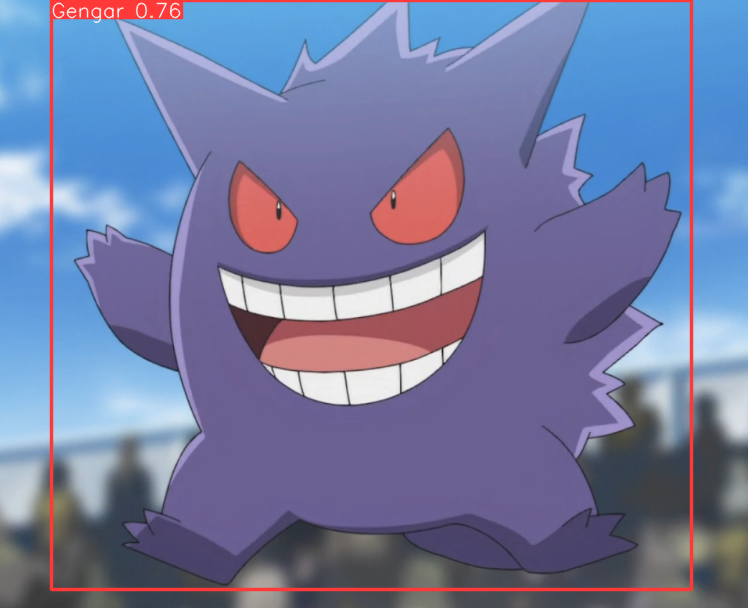

In [7]:
# View image 
Image.open('/opt/app-root/src/pokedex-demo/Notebooks/ultralytics/runs/detect/predict/pokemon5.png')

# Export 
Finally, we're going to export our file in ONNX format so we can use it in our application. Make sure to change the path to correspond with where your weights are saved.

In [12]:
model.export(format='onnx')

Ultralytics YOLOv8.0.221 🚀 Python-3.9.16 torch-1.13.1+cu117 CPU (Intel Xeon Platinum 8259CL 2.50GHz)

PyTorch: starting from '/opt/app-root/src/pokedex-demo/Notebooks/ultralytics/runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 153, 8400) (49.8 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 222.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.9s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 16...



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


ONNX: export success ✅ 6.8s, saved as '/opt/app-root/src/pokedex-demo/Notebooks/ultralytics/runs/detect/train2/weights/best.onnx' (99.1 MB)

Export complete (9.1s)
Results saved to /opt/app-root/src/pokedex-demo/Notebooks/ultralytics/runs/detect/train2/weights
Predict:         yolo predict task=detect model=/opt/app-root/src/pokedex-demo/Notebooks/ultralytics/runs/detect/train2/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/opt/app-root/src/pokedex-demo/Notebooks/ultralytics/runs/detect/train2/weights/best.onnx imgsz=640 data=/opt/app-root/src/pokedex-demo/database/PokemonYOLOv5/data.yaml  
Visualize:       https://netron.app


'/opt/app-root/src/pokedex-demo/Notebooks/ultralytics/runs/detect/train2/weights/best.onnx'

# Next
Now that we have exported our model, let's head back to [the pokedex repository](https://github.com/OpenShiftDemos/pokedex-demo/blob/main/docs/deploy_microshift.md) to deploy our Pokedex application using MicroShift. 



# Video Recognition
Now let's do some more predictions with a video.

In [8]:
# Predict with the model
results = model('/opt/app-root/src/pokedex-demo/database/Predictions/pokemon.mp4', save=True, imgsz=1200)  # predict on a video -  conf=0.5


WARNING ⚠️ imgsz=[1200] must be multiple of max stride 32, updating to [1216]

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/293) /opt/app-root/src/pokedex-demo/database/Predictions/pokemon.mp4: 704x1216 (no detections), 61.9ms
video 1/1 (2/293) /opt/app-root/src/pokedex-demo/database/Predictions/pokemon.mp4: 704x1216 (no detections), 55.4ms
video 1/1 (3/293) /opt/app-root/src/pokedex-demo/database/Predictions/pokemon.mp4: 704x1216 (no detections), 51.0ms
video 1/1 (4/293) /opt/app-roo